In [2]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(stringr))
library(gridExtra)
library('ggh4x')
library("cowplot")
library(patchwork)
library(ggpubr)

is_dark_color <- function(hex) {
  rgb <- col2rgb(hex)
  
  luminance <- 0.299 * rgb[1,] + 0.587 * rgb[2,] + 0.114 * rgb[3,]
  if(luminance < 128){
  return('white')
  }else{return('black')}
}

Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘gridExtra’ was built under R version 4.3.3”

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Warning message:
“package ‘cowplot’ was built under R version 4.3.3”
Warning message:
“package ‘patchwork’ was built under R version 4.3.3”

Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




In [3]:
color_annotation <- read.csv('../Color_hex_codes/Cell_Type_Color_Annotation_and_Order.csv')
color_vector <- setNames(color_annotation$color, color_annotation$label)

# Read NMF Scores

In [4]:
df<-read.csv('01_NMF_CD4_T_cell_Projection//Th2_Th1_Tfh_Baseline_Samples_BRI.csv')

In [5]:
df <- df %>% dplyr::mutate(`Age Group` = case_when(
  cohort.cohortGuid == "BR1" ~ "Young",
  cohort.cohortGuid == "BR2" ~ "Older",
  TRUE ~ NA_character_
))
df$`Age Group`<-factor(df$`Age Group`,levels=c("Young","Older"))

In [6]:
unique(df$NMF_Scores)

[1] "NMF11_Th1" "NMF5_Th2"  "NMF6_Tfh"

In [7]:
df_sub_Th2<-df %>% filter(NMF_Scores=='NMF5_Th2',AverageScore<0.1)
df_sub_Th1<-df %>% filter(NMF_Scores=='NMF11_Th1')

In [8]:
head(df_sub_Th2)

,X.1,pbmc_sample_id,NMF_Scores,AIFI_L3,AverageScore,X,Unnamed..0,lastUpdated,sample.id,sample.bridgingControl,⋯,subject.race,subject.subjectGuid,cohort.cohortGuid,sample.diseaseStatesRecordedAtVisit,subject.covidVaxDose1.daysSinceFirstVisit,subject.covidVaxDose2.daysSinceFirstVisit,Covid_exclusion,subjectGuid,CMV,Age Group
,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<lgl>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
1,2,PB00001-01,NMF5_Th2,CM CD4 T cell,0.02702291,0,1,2024-05-10T17:12:44.959Z,f499ff83-e513-4d24-a10f-151348269fff,False,⋯,Caucasian,BR1001,BR1,NA,NA,NA,no,BR1001,Negative,Young
2,5,PB00002-01,NMF5_Th2,CM CD4 T cell,0.02641466,1,2,2024-05-10T17:12:44.959Z,750e90a9-a296-4f0f-969f-60225c2bca17,False,⋯,Caucasian,BR1002,BR1,NA,440,461,no,BR1002,Negative,Young
3,8,PB00003-01,NMF5_Th2,CM CD4 T cell,0.02087501,2,3,2024-05-10T17:12:44.959Z,2db6fb3f-e3f4-454b-891b-9b068541b51d,False,⋯,Caucasian,BR1003,BR1,NA,440,461,no,BR1003,Negative,Young
4,11,PB00004-01,NMF5_Th2,CM CD4 T cell,0.01579497,3,4,2024-05-10T17:12:44.959Z,f04693c5-563c-4b5b-ae58-877d0d9ae2fe,False,⋯,Caucasian,BR1004,BR1,NA,543,563,no,BR1004,Negative,Young
5,14,PB00006-01,NMF5_Th2,CM CD4 T cell,0.03070205,4,5,2024-05-10T17:12:44.959Z,eb5b3a3d-002e-40a6-aa19-aa0e6a7fff8f,False,⋯,Caucasian,BR1005,BR1,NA,451,492,no,BR1005,Negative,Young
6,17,PB00010-02,NMF5_Th2,CM CD4 T cell,0.01994635,8,9,2024-05-10T17:12:44.959Z,f32ac061-0ede-4040-8d8c-35229ea5229c,False,⋯,Caucasian,BR1006,BR1,NA,510,538,no,BR1006,Negative,Young


In [11]:
write.csv(rbind(df_sub_Th2,df_sub_Th1) %>% select(subject.subjectGuid,sample.daysSinceFirstVisit,pbmc_sample_id,AIFI_L3,NMF_Scores, `Age Group`,AverageScore) ,
          "/home/workspace/Source_Data/Fig5b.csv", row.names=FALSE)

In [7]:
selected_celltype<-"CM CD4 T cell"

`geom_smooth()` using formula = 'y ~ x'


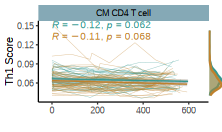

In [19]:

p1 <- ggplot(df_sub_Th1 , aes(sample.daysSinceFirstVisit, AverageScore, color = `Age Group`)) +
geom_line(aes(group = interaction(`Age Group`, subject.subjectGuid)), 
              linewidth=0.1, 
              alpha=0.5,
              linetype =1)+
  ylab('Th1 Score') +xlab('Days since First Draw') +
  theme_bw(base_size = 6) +
  theme(
    axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()
  ) + 
  scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  geom_smooth(method = "lm", se = TRUE, 
              linewidth = 0.3) +
  facet_wrap2(~AIFI_L3, axes = "all", 
              remove_labels = "all", ncol = 1, scale = 'free_y') +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    strip.background = element_rect(fill = adjustcolor(color_vector[selected_celltype], alpha.f = 0.8), color = NA),
    strip.text = element_text(color = is_dark_color(adjustcolor(color_vector[selected_celltype], alpha.f = 0.8)))
  ) +
  xlab('') +
  theme(legend.position = "none") +
  stat_cor(data = df_sub_Th1 %>% filter( `Age Group` == "Older"),
           method = "spearman",
           label.x.npc = "left",
            label.y = 0.12 * 1.1,
           size = 2.1, color = '#bf812d') +
  stat_cor(data = df_sub_Th1 %>% filter( `Age Group` == "Young"),
           method = "spearman",
           label.x.npc = "left",
           label.y = 0.12 * 1.25,
           size = 2.1, color = '#35978f')+  
scale_x_continuous(expand = expansion(mult = c(0.1, 0.15))) 


p2 <- ggplot(df_sub_Th1 , aes(AverageScore, fill = `Age Group`, color = `Age Group`)) +
  geom_density(alpha = 0.5, linewidth = 0.5) +
  scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  coord_flip() +
  theme_void(base_size = 8) +
  theme(legend.position = "none") +
  theme(plot.margin = margin(0, 0, 0, -1, "mm"))+  
scale_x_continuous(expand = expansion(mult = c(0.1, 0.15))) 


combined_plot <- plot_grid(p1,
                           p2,
                           ncol = 2, 
                           rel_widths = c(10, 0.4), 
                           align = 'h', 
                           axis = 'tb')
options(repr.plot.width = 47/25.4, repr.plot.height = 28/25.4)

combined_plot
ggsave('FigureE-1.pdf',combined_plot,width = 47/25.4,
       height = 28/25.4)

`geom_smooth()` using formula = 'y ~ x'


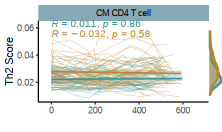

In [20]:
p1 <- ggplot(df_sub_Th2 , aes(sample.daysSinceFirstVisit, AverageScore, color = `Age Group`)) +
geom_line(aes(group = interaction(`Age Group`, subject.subjectGuid)), 
              linewidth=0.1, 
              alpha=0.5,
              linetype =1)+
  ylab('Th2 Score') +xlab('Days since First Draw') +
  theme_bw(base_size = 6) +
  theme(
    axis.line = element_line(colour = "black"),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    panel.background = element_blank()
  ) + 
  scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  geom_smooth(method = "lm", se = TRUE, 
              linewidth = 0.3) +
  facet_wrap2(~AIFI_L3, axes = "all", 
              remove_labels = "all", ncol = 1, scale = 'free_y') +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    strip.background = element_rect(fill = adjustcolor(color_vector[selected_celltype], alpha.f = 0.8), color = NA),
    strip.text = element_text(color = is_dark_color(adjustcolor(color_vector[selected_celltype], alpha.f = 0.8)))
  ) +
  xlab('') +
  theme(legend.position = "none") +
  stat_cor(data = df_sub_Th2 %>% filter( `Age Group` == "Older"),
           method = "spearman",
           label.x.npc = "left",
            label.y = 0.05 * 1.1,
           size = 2.1, color = '#bf812d') +
  stat_cor(data = df_sub_Th2 %>% filter( `Age Group` == "Young"),
           method = "spearman",
           label.x.npc = "left",
           label.y = 0.05 * 1.25,
           size = 2.1, color = '#35978f')+  
scale_x_continuous(expand = expansion(mult = c(0.1, 0.2))) 


p2 <- ggplot(df_sub_Th2 , aes(AverageScore, fill = `Age Group`, color = `Age Group`)) +
  geom_density(alpha = 0.5, linewidth = 0.5) +
  scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  coord_flip() +
  theme_void(base_size = 8) +
  theme(legend.position = "none") +
  theme(plot.margin = margin(0, 0, 0, -1, "mm"))+  
scale_x_continuous(expand = expansion(mult = c(0.1, 0.15))) 


combined_plot <- plot_grid(p1,
                           p2,
                           ncol = 2, 
                           rel_widths = c(10, 0.4), 
                           align = 'h', 
                           axis = 'tb')
options(repr.plot.width = 47/25.4, repr.plot.height = 28/25.4)

combined_plot
ggsave('FigureE-2.pdf',combined_plot,width = 47/25.4,height = 28/25.4)